## Classify Fashion MNIST

### Import Dataset

In [1]:
import torch
from torchvision import datasets, transforms
import helper
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Transformation
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

#### Display an image

In [2]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

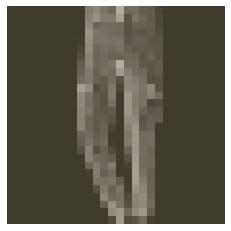

In [3]:
image, label = next(iter(trainloader))
imshow(image[0,:]);

> NOTE: images will be flattened from 28 by 28 to 28X28

In [4]:
image.shape

torch.Size([64, 1, 28, 28])

In [5]:
#transform the sample image 
sample_image = image.view(image.shape[0], -1)
print(sample_image.shape,label.shape)

torch.Size([64, 784]) torch.Size([64])


## Network Design

In [36]:
import torch.nn.functional as F
from torch import nn

class Network(nn.Module):
    def __init__(self,input_shape,output_shape):
        ''' 
            args:
                input_shape int: number of features in the input images
                outpu_shape int: number of classes to which images will be classifed
        '''
        super().__init__()
        self.input_shape = input_shape
        self.output_shape = output_shape
        # fully connected layers
        self.fc1 = nn.Linear(self.input_shape, 32) # outputs 128 values (128*input_shape weights + 128 biases)
        self.fc2 = nn.Linear(32,64)
        self.fc3 = nn.Linear(64,32)
        self.fc4 = nn.Linear(32, self.output_shape) 
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits ''' 
        
        # pass it through the network
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network(input_shape = sample_image.shape[1],output_shape=10)
print(model)

Network(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)


## Set Loss and Optimizer

In [37]:
from torch import optim
criterion = nn.NLLLoss() # Loss function Negative log likelyhood loss
optimizer = optim.Adam(model.parameters(), lr=0.01) #  learning rate 0.003

## Train the model

In [38]:
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        #flaten the images
        images = images.view(images.shape[0], -1)
        # Training pass
        output = model(images) # directly passes the images into forward method
        loss = criterion(output, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss}")

Training loss: -360.20183453708887
Training loss: -241.06218495965004
Training loss: -186.64193364977837
Training loss: -267.92202140390873
Training loss: -246.1220649778843
Training loss: -252.20226126909256
Training loss: -255.430664986372
Training loss: -265.2184055149555
Training loss: -273.2342419922352
Training loss: -273.5625002384186


## Display Results

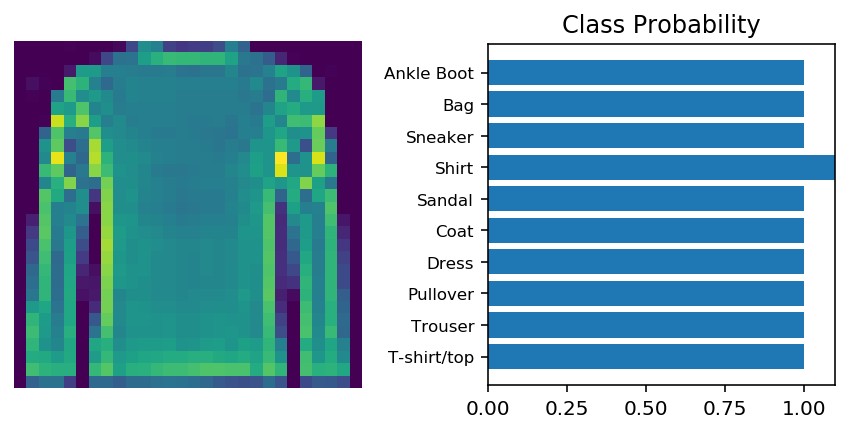

In [40]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper1

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)
#Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)
# Plot the image and probabilities
helper1.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')